In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,linear_model
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data,target=datasets.load_iris(return_X_y=True,as_frame=True)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [6]:
data['Species']=target

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
data.columns=data.columns.str.replace(")","").str.lower().str.strip()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5392\4101583174.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns=data.columns.str.replace(")","").str.lower().str.strip()


In [17]:
data.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [25]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:

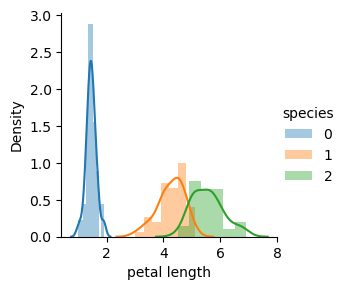

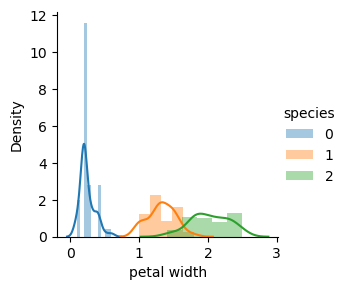

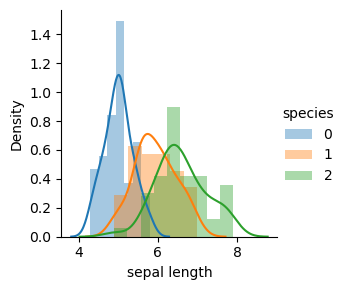

In [26]:
sns.FacetGrid(data,hue="species").map(sns.distplot,"petal length").add_legend()
sns.FacetGrid(data,hue="species").map(sns.distplot,"petal width").add_legend()
sns.FacetGrid(data,hue="species").map(sns.distplot,"sepal length").add_legend()
plt.show()

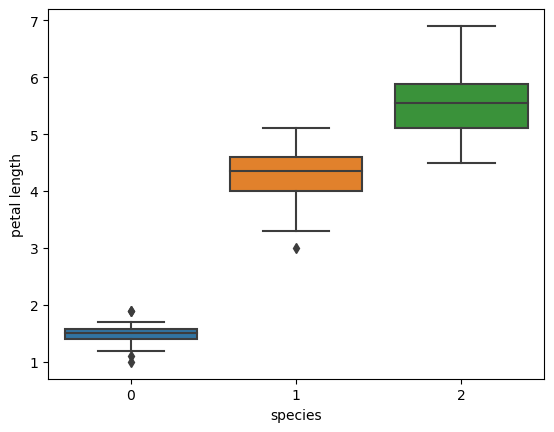

In [28]:
sns.boxplot(x="species",y="petal length",data=data)
plt.show()

In [29]:
X=data.drop('species',axis=1)
y=target

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [35]:

#Linear Regression
model=linear_model.LinearRegression()
model.fit(X,y)
pred_value=model.predict(x_test).round()


In [36]:
pred_value

array([ 1.,  1., -0.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,  1.,
        2.,  2.,  0.,  2.,  1.,  1., -0.,  1.,  1., -0.,  1.,  0.,  2.,
        1.,  2.,  2., -0.])

In [37]:
accuracy_score(pred_value,y_test)

0.9666666666666667

In [39]:
cf=confusion_matrix(pred_value,y_test)
cf

array([[ 6,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

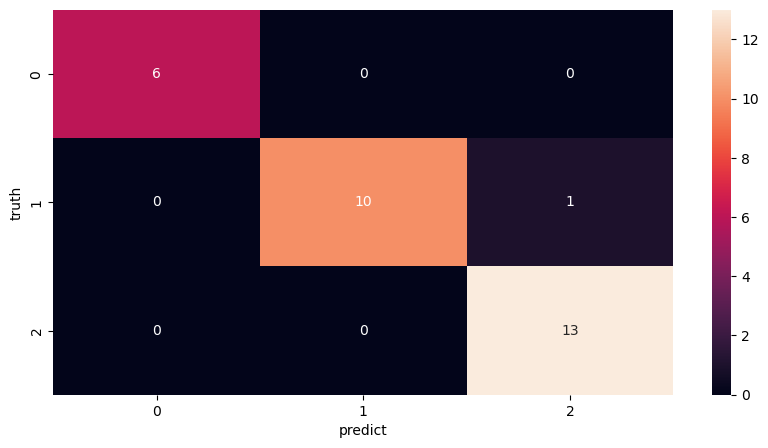

In [42]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cf, annot= True)
plt.xlabel('predict')
plt.ylabel('truth')

In [63]:
#diabeties
dia,label=datasets.load_breast_cancer(return_X_y=True,as_frame=True)

In [64]:
dia.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [66]:
label.value_counts()

1    357
0    212
Name: target, dtype: int64

<Axes: >

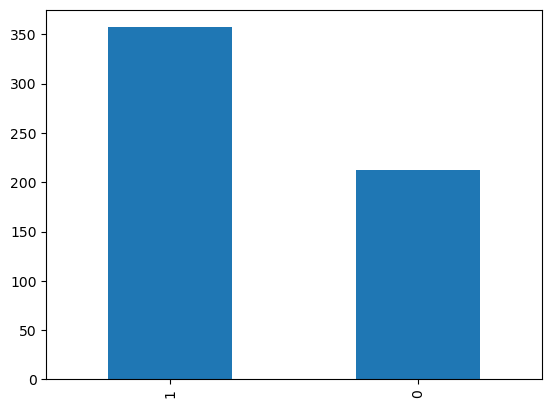

In [68]:
label.value_counts().plot(kind='bar')

In [70]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(dia,label,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [76]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=abs(model.predict(x_test).round())
values

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [78]:
accuracy_score(values,y_test)

0.9473684210526315

In [79]:
cf=confusion_matrix(values,y_test)
cf

array([[35,  0],
       [ 6, 73]], dtype=int64)

In [80]:
df=pd.DataFrame(cf,index=['Pred T','Pred F'],columns=['Actual T','Actual F'])
df

,Actual T,Actual F
Pred T,35,0
Pred F,6,73


<Axes: xlabel='target', ylabel='Density'>

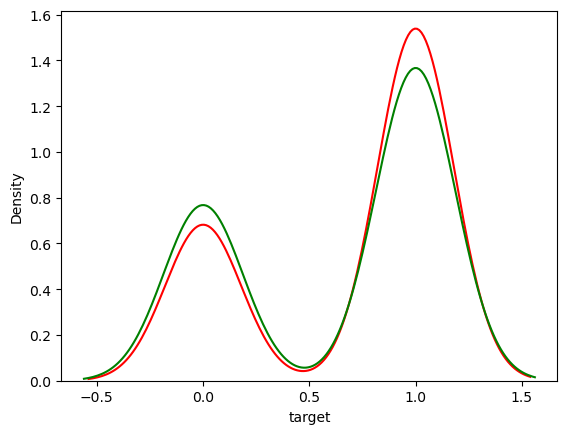

In [82]:
sns.kdeplot(values,color='r')
sns.kdeplot(y_test,color='g')

In [84]:
#Create report
from sklearn.metrics import classification_report
target_names=['Without Disease','With Disease']
print(classification_report(y_test,values,target_names=target_names))

                 precision    recall  f1-score   support

Without Disease       1.00      0.85      0.92        41
   With Disease       0.92      1.00      0.96        73

       accuracy                           0.95       114
      macro avg       0.96      0.93      0.94       114
   weighted avg       0.95      0.95      0.95       114



In [86]:
#house price prediction
house,target=datasets.fetch_california_housing(as_frame=True,return_X_y=True)

In [87]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [88]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(house,target,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape

((16512, 8), (4128, 8))

In [90]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=model.predict(x_test)
values

array([1.41479284, 1.78251859, 2.41137377, ..., 1.13516576, 1.31681073,
       2.04197735])

In [95]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(values,y_test)
mse

0.512799527993114

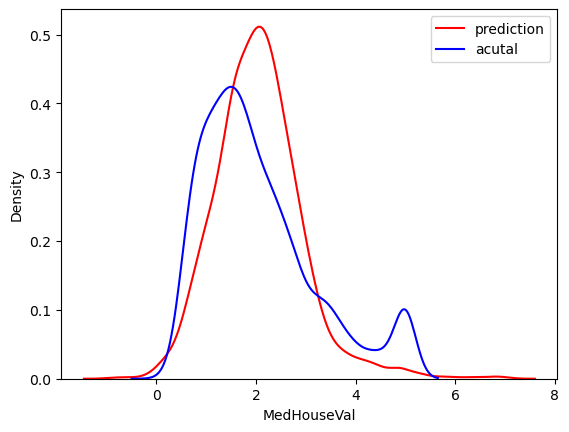

In [96]:
sns.kdeplot(values,color='r',label='prediction')
sns.kdeplot(y_test,color='b',label='acutal')
plt.legend()
plt.show()

In [132]:
credit=pd.read_csv('creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [133]:
credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [100]:
len(credit.columns)

31

In [104]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [135]:
#Imbalanced data
#So will just use sampling from 0 class label to be able to balance with 1 class label
#First we name these two class label data with two differnt name
fraud=credit[credit.Class==1]
legit=credit[credit.Class==0]

In [136]:
legit_sample=legit.sample(n=492)
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
40128,40107.0,1.377779,-1.002993,-0.628975,-1.786356,0.996161,3.540879,-1.563949,0.922995,-0.546498,...,0.345605,0.745319,-0.162846,1.050614,0.579699,-0.037236,0.035357,0.023993,39.00,0
95225,65216.0,1.215478,-1.648093,1.235789,-1.261636,-2.185744,0.030466,-1.677553,0.136587,-1.237400,...,0.164613,0.702632,-0.062539,0.091505,0.091653,-0.022760,0.080105,0.053006,117.50,0
204654,135381.0,1.960456,-0.086483,-1.563925,0.440785,0.395051,-0.063107,-0.217687,0.062985,0.506286,...,-0.074858,-0.165491,0.161461,0.132141,-0.186979,0.197683,-0.034973,-0.030153,29.95,0
19618,30414.0,1.236855,-0.263186,0.345918,-0.742708,-0.769875,-0.994078,-0.046605,-0.240839,1.591054,...,-0.040771,0.252704,-0.181397,0.448643,0.866877,-0.642149,0.074883,0.026197,22.53,0
266875,162521.0,0.524278,-0.809615,-0.184095,-1.847044,-1.352484,-0.390204,-1.260830,0.492672,-1.860421,...,0.016968,0.308426,0.242992,-0.379508,-0.836025,-0.169652,-0.089214,-0.169588,24.30,0


In [138]:
len(legit_sample)

492

In [137]:
len(fraud)

492

In [139]:
#Then merge again these splitted legit and fraud
credit=pd.concat([legit_sample,fraud],axis=0)

In [140]:
len(credit)

984

In [141]:
X=credit.drop(columns=['Time','Class'],axis=1)
y=credit['Class']

In [142]:
len(X)

984

In [143]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape

((787, 29), (197, 29))

In [146]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=abs(model.predict(x_test).round())
values

array([1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 2., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1.])

In [147]:
accuracy_score(values,y_test)

0.8934010152284264

In [148]:
cf=confusion_matrix(values,y_test)
cf

array([[97, 18,  0],
       [ 0, 79,  0],
       [ 0,  3,  0]], dtype=int64)

In [149]:
#car data
car=pd.read_csv("car data.csv")
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [155]:
car.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
#Data Preprocessing

In [157]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
car.Car_Name = encoder.fit_transform(car.Car_Name.values.reshape(-1,1))

In [158]:
car.Car_Name

0      90.0
1      93.0
2      68.0
3      96.0
4      92.0
       ... 
296    69.0
297    66.0
298    69.0
299    69.0
300    66.0
Name: Car_Name, Length: 301, dtype: float64

In [159]:
car.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [160]:
car.Fuel_Type = encoder.fit_transform(car.Fuel_Type.values.reshape(-1,1))

In [162]:
car.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [163]:
car.Seller_Type = encoder.fit_transform(car.Seller_Type.values.reshape(-1,1))

In [164]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90.0,2014,3.35,5.59,27000,2.0,0.0,Manual,0
1,93.0,2013,4.75,9.54,43000,1.0,0.0,Manual,0
2,68.0,2017,7.25,9.85,6900,2.0,0.0,Manual,0
3,96.0,2011,2.85,4.15,5200,2.0,0.0,Manual,0
4,92.0,2014,4.60,6.87,42450,1.0,0.0,Manual,0


In [165]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [166]:
car.Transmission = encoder.fit_transform(car.Transmission.values.reshape(-1,1))

In [167]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90.0,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,93.0,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,68.0,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,96.0,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,92.0,2014,4.60,6.87,42450,1.0,0.0,1.0,0


In [168]:
#Let's split features and labels
X=car.drop('Selling_Price',axis=1)
y=car['Selling_Price']

In [169]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape

((240, 8), (61, 8))

In [171]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=abs(model.predict(x_test))
values

array([4.73462066e+00, 1.84787795e+00, 2.09866026e+00, 6.43524102e+00,
       2.42254852e+00, 3.52438377e+00, 4.57338869e+00, 1.79768677e+01,
       5.55693037e+00, 8.80872215e+00, 3.42361629e+00, 3.31326640e+00,
       4.15472074e+00, 9.45949775e+00, 4.34016392e+00, 6.34057900e+00,
       1.69107368e+00, 7.92214651e+00, 3.91758344e+00, 2.45513075e+00,
       2.20884766e+01, 7.88067931e+00, 5.48258116e+00, 2.55852871e+00,
       2.54057852e-04, 1.98185094e+00, 2.28359532e+00, 4.16051186e+00,
       2.95511361e+00, 5.12307692e-01, 1.94180324e+00, 3.55723187e-01,
       9.99329040e+00, 7.02020173e+00, 2.62919103e+00, 1.13858889e+01,
       9.75374716e+00, 3.33088184e+00, 2.65100340e+00, 2.04056953e+00,
       1.03047174e+01, 1.04269351e+00, 3.24455773e+00, 1.70695625e+01,
       6.12574797e+00, 7.96161614e+00, 2.21758314e+00, 9.75265826e+00,
       2.24288349e+00, 1.29089381e+01, 5.36139344e-01, 1.74788716e+00,
       3.33392586e+00, 5.08962673e+01, 1.25009199e+00, 8.78058374e+00,
      

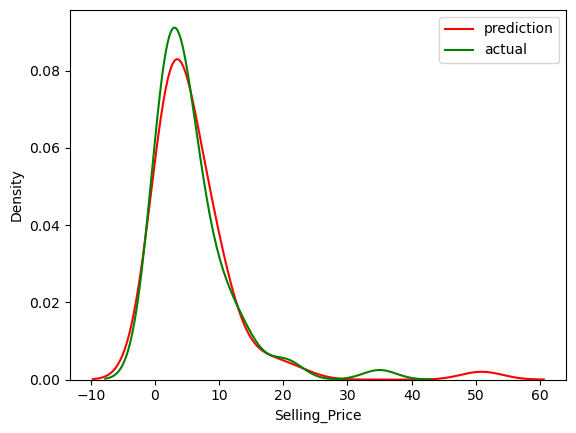

In [172]:
sns.kdeplot(values,color='r',label='prediction')
sns.kdeplot(y_test,color='g',label='actual')
plt.legend()

In [173]:
mse=mean_squared_error(values,y_test)
mse

6.248650624601316

In [178]:
y_test.index

Int64Index([ 36,  31, 110, 272,  73,  20,  75,  50, 286, 212, 246, 205, 234,
             83,  92,  74, 112, 283, 271, 101,  59,  45, 249, 103, 170, 177,
             24, 290,  58, 140, 105, 180, 250,   9, 248,  99,  95,  88,  41,
            128,  98,  44,  19,  96,  43, 279, 210, 232, 239,  69, 167, 122,
            204,  86, 191, 260,  35, 296, 281,  27, 130],
           dtype='int64')

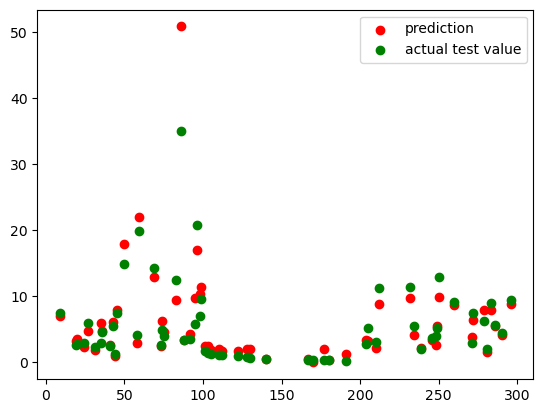

In [180]:
plt.scatter(y_test.index,values,label='prediction',color='r')
plt.scatter(y_test.index,y_test,label='actual test value',color='g')
plt.legend()
plt.show()

In [182]:
#R squared error
from sklearn.metrics import r2_score

r2=r2_score(values,y_test)
r2

0.881946825493857

In [183]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(values,y_test)
mae

1.3430410684336334

In [184]:
#petrol consumption
petrol=pd.read_csv('petrol_consumption.csv')
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [185]:
X=petrol.drop('Petrol_Consumption',axis=1)
y=petrol['Petrol_Consumption']

In [186]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape

((38, 4), (10, 4))

In [187]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=abs(model.predict(x_test))
values

array([575.03690122, 629.87296073, 581.73079608, 416.42563441,
       502.02785676, 585.9774479 , 711.96985626, 473.47438773,
       501.71708129, 485.33457546])

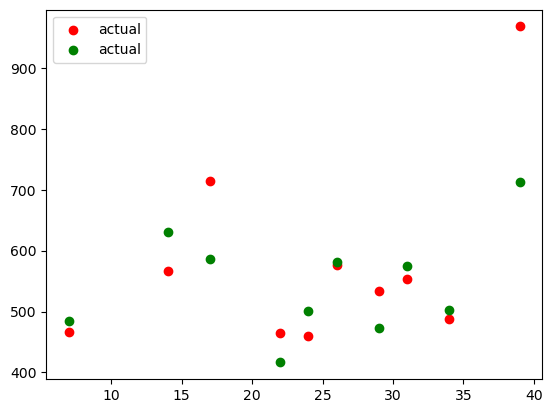

In [188]:
plt.scatter(y_test.index,y_test,color='r',label='actual')
plt.scatter(y_test.index,values,color='g',label='actual')
plt.legend()
plt.show()

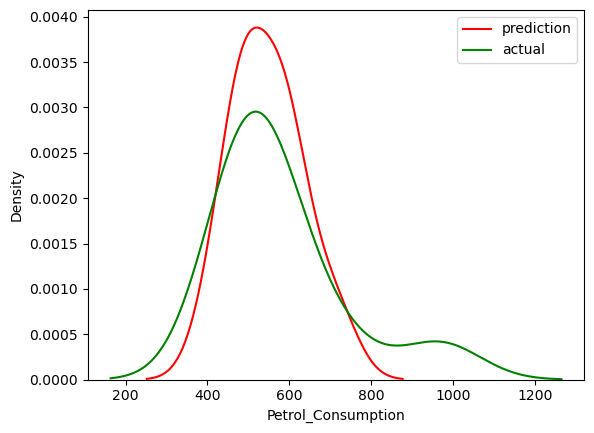

In [191]:
sns.kdeplot(values,color='r',label='prediction')
sns.kdeplot(y_test,color='g',label='actual')
plt.legend()

In [192]:
mse=mean_squared_error(values,y_test)

In [193]:
mse

9471.487311188028

In [196]:
#heart_diease
heart=pd.read_csv('heart_disease.csv')
heart.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [197]:
heart.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [198]:
#let's remove unnicessary coloumns
heart.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

In [199]:
heart.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [200]:
heart.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [201]:
X=heart.drop('diagnosis',axis=1)
y=heart['diagnosis']

In [202]:

y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [204]:
#let's change y to number
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(y)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [206]:
x_train,x_test,y_train,y_test=train_test_split(X,label,test_size=0.2,shuffle=True,random_state=3)

In [207]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [208]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=abs(model.predict(x_test))
values

array([0.00559733, 0.33865416, 0.10419453, 0.00256734, 0.69582731,
       0.08264913, 0.11412919, 0.16554538, 0.18284116, 0.05916286,
       0.17959512, 0.60314234, 0.05625197, 0.13241415, 0.0268067 ,
       0.11531874, 0.11134915, 0.13831216, 1.06321236, 0.30256008,
       0.09313211, 0.04264277, 0.29478446, 0.26828035, 0.05693523,
       0.0567983 , 0.02415484, 1.01399034, 1.17045093, 0.21140616,
       0.55488089, 0.44009289, 0.21365624, 0.04261598, 0.14168552,
       0.02644846, 0.05658924, 0.20820187, 0.90830775, 1.0083585 ,
       1.06717292, 0.02953935, 0.05995193, 0.6424045 , 0.24831777,
       0.62904966, 0.48702619, 0.34051377, 0.65074766, 0.02492291,
       0.96388996, 0.12334871, 0.21818811, 0.60392036, 0.97234547,
       0.15249758, 0.10015554, 0.26975839, 0.08982581, 0.13619571,
       0.13266564, 0.26781433, 1.05894708, 0.61538845, 0.06785594,
       0.11058691, 0.88378788, 0.09391192, 1.00039771, 0.79326758,
       0.18356707, 0.49733861, 1.2689241 , 0.97788069, 0.18188

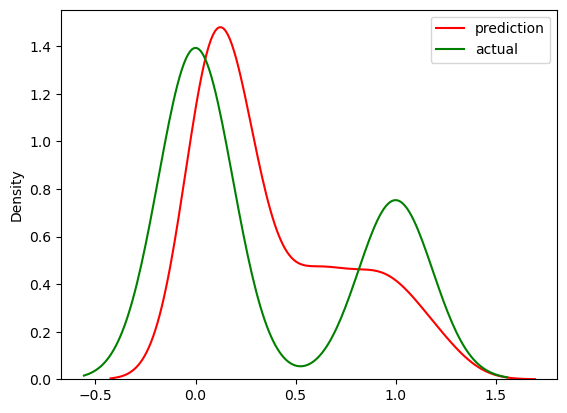

In [209]:
sns.kdeplot(values,color='r',label='prediction')
sns.kdeplot(y_test,color='g',label='actual')
plt.legend()

In [210]:
mse=mean_squared_error(values,y_test)
mse

0.0576656292797578

In [213]:
values

array([0.00559733, 0.33865416, 0.10419453, 0.00256734, 0.69582731,
       0.08264913, 0.11412919, 0.16554538, 0.18284116, 0.05916286,
       0.17959512, 0.60314234, 0.05625197, 0.13241415, 0.0268067 ,
       0.11531874, 0.11134915, 0.13831216, 1.06321236, 0.30256008,
       0.09313211, 0.04264277, 0.29478446, 0.26828035, 0.05693523,
       0.0567983 , 0.02415484, 1.01399034, 1.17045093, 0.21140616,
       0.55488089, 0.44009289, 0.21365624, 0.04261598, 0.14168552,
       0.02644846, 0.05658924, 0.20820187, 0.90830775, 1.0083585 ,
       1.06717292, 0.02953935, 0.05995193, 0.6424045 , 0.24831777,
       0.62904966, 0.48702619, 0.34051377, 0.65074766, 0.02492291,
       0.96388996, 0.12334871, 0.21818811, 0.60392036, 0.97234547,
       0.15249758, 0.10015554, 0.26975839, 0.08982581, 0.13619571,
       0.13266564, 0.26781433, 1.05894708, 0.61538845, 0.06785594,
       0.11058691, 0.88378788, 0.09391192, 1.00039771, 0.79326758,
       0.18356707, 0.49733861, 1.2689241 , 0.97788069, 0.18188

In [215]:
heart=pd.read_csv('heart_disease_data.csv')
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [219]:
X=heart.drop('target',axis=1)
y=heart['target']

In [220]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=3)
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
values=abs(model.predict(x_test))
print(values)

[0.4203792  0.91810407 0.57341005 0.90391717 0.54774852 1.12028035
 0.04990972 0.16712753 0.66095265 0.83458298 0.28183555 0.40651904
 0.49973888 0.20126332 0.01620082 0.67511718 0.63000279 0.28046356
 0.9393261  0.75075547 0.06234124 0.97034039 0.93162507 0.61744656
 0.89831123 1.1330326  1.11788013 0.68523954 0.91223025 0.31786296
 0.76782144 0.07382274 0.46699566 0.31857951 0.59683085 0.02217629
 0.99897359 0.62070499 0.87282074 1.03106842 0.77400416 0.91723884
 1.09819123 1.01281712 0.60978237 0.27629361 0.62644514 0.74911201
 0.30618164 0.96191011 1.02842177 0.60969014 1.03557046 0.50228991
 1.10404562 0.22174379 0.84883811 0.80101786 0.58900107 0.64619453
 0.66604146]


In [221]:
mse=mean_squared_error(values,y_test)
mse

0.10358465109975129

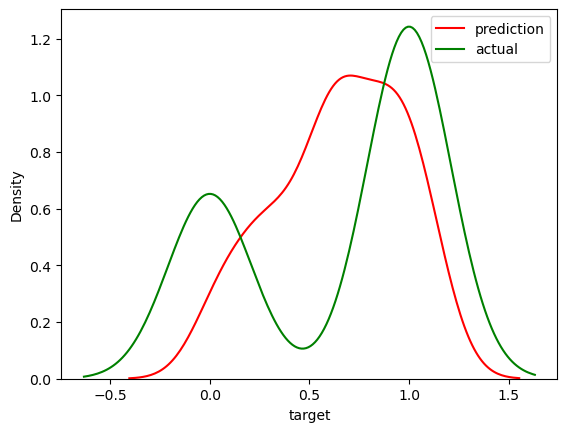

In [222]:
sns.kdeplot(values,color='r',label='prediction')
sns.kdeplot(y_test,color='g',label='actual')
plt.legend()

In [ ]:
#Linear Regression with Tensorflow


In [234]:
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#Load Iris dataset from tensorflow

In [236]:
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
training = training[training['Species'] >= 1]
training['Species'] = training['Species'].replace([1,2], [0,1])
test = pd.read_csv(test_data_path, names=col_names, header=0)
test = test[test['Species'] >= 1]
test['Species'] = test['Species'].replace([1,2], [0,1])

training.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

iris_dataset = pd.concat([training, test], axis=0)

In [237]:
iris_dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


In [238]:
correlation_data = iris_dataset.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidth,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLength,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidth,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.494305,0.308080,0.786424,0.828129,1.000000


In [239]:
X_data = iris_dataset[[m for m in iris_dataset.columns if m not in ['Species']]]
Y_data = iris_dataset[['Species']]

In [240]:
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

In [241]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  80
No. of rows in Test Features:  20
No. of columns in Training Features:  4
No. of columns in Test Features:  4
No. of rows in Training Label:  80
No. of rows in Test Label:  20
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [ ]:
#normalize the data

In [242]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [243]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

In [244]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

In [245]:
linear_model = LinearClassifier(feature_columns=feature_columns_numeric)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dell\\AppData\\Local\\Temp\\tmpaym3ffsv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [246]:
linear_model.train(train_feed_input)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Dell\AppData\Local\Temp\tmpaym3ffsv\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 30...
INFO:tensorflow:Saving checkpoints for 30 into C:\Users\Dell\AppData\Local\Temp\tmpaym3ffsv\model.ckpt.
INFO:tensorflow:Cal

In [248]:
train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)

In [249]:
train_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dell\AppData\Local\Temp\tmpaym3ffsv\model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dell\AppData\Local\Temp\tmpaym3ffsv\model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [252]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

In [253]:
test_predictions_df.head()

,predictions
0,0
1,0
2,1
3,1
4,1


In [254]:
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall


In [255]:
train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  93.75
Training Data Precision (%) =  94.59
Training Data Recall (%) =  92.11
--------------------------------------------------
Test Data Accuracy (%) =  100.0
Test Data Precision (%) =  100.0
Test Data Recall (%) =  100.0


In [ ]:
#Iris with cnn

In [257]:
data,target=datasets.load_iris(return_X_y=True,as_frame=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [258]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [260]:
target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [262]:

X=data
y=target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [265]:
from keras.utils import to_categorical
#Change y to categorical from numeric
y = to_categorical(y)

In [266]:
#Iris with CNN
import pandas as pd 
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


model=Sequential()
model.add(Dense(64,activation='relu',input_shape=[4]))
model.add(Dense(64))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['acc'])


model.fit(X, y, epochs=100)



Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 1.4845 - acc: 0.3400
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8193 - acc: 0.6600
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7636 - acc: 0.7267
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7139 - acc: 0.6733
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6731 - acc: 0.7267
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6856 - acc: 0.6733
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6396 - acc: 0.7133
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5904 - acc: 0.7933
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5818 - acc: 0.7533
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5946 - acc: 0.6800
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5527 

5/5 [==============================] - 0s 4ms/step - loss: 0.1747 - acc: 0.9467
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1607 - acc: 0.9733
Epoch 91/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1769 - acc: 0.9467
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1686 - acc: 0.9467
Epoch 93/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2291 - acc: 0.9133
Epoch 94/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1508 - acc: 0.9600
Epoch 95/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1528 - acc: 0.9667
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1610 - acc: 0.9533
Epoch 97/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1706 - acc: 0.9733
Epoch 98/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1567 - acc: 0.9600
Epoch 99/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1490 - ac

In [268]:
pred_value=model.predict(X).round()
accuracy_score(pred_value,y)

5/5 [==============================] - 0s 4ms/step


0.9733333333333334